In [1]:
import numpy as np, pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression


### Read in data as a pandas dataframe -- more realistic handling of everday data

In [2]:
# READ DATA INTO A PANDAS DATAFRAME
data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
                   header=None)
colnames = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

data.columns = colnames

# ASSIGN A NUMBER TO EACH UNIQUE SPECIES. WILL USE THESE NUMBERS INSTEAD OF NAMES.
data['Species'] = data['species'].map( {'Iris-setosa': 0, 
                                        'Iris-versicolor': 1, 
                                        'Iris-virginica': 2} ).astype(int)

In [ ]:
X = data.loc[:, 'sepal_length':'petal_width']
y = data.Species
X_new = [[3, 5, 4, 2], [5, 4, 3, 2]]


In [ ]:
X.head()

In [ ]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X, y)

# predict the response for new observations
logreg.predict(X_new)

These colored boundaries were predicted using 
    
    logreg.predict(np.c_[xx.ravel(), yy.ravel()])
    
where the xx and yy are arrays holding (x,y) values for evenly spaced data points across the whole plot. 

## Set up as Function

In [3]:

def plot_iris_meshgrid(**kwargs):
    X, y, xcol, ycol, h = [kwargs[key] for key in kwargs.keys()]
    #try:
    plt.clf()
    #except:
    #    pass

    logreg = LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial')

    # Create an instance of Logistic Regression Classifier and fit the data.
    logreg.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X.loc[:, xcol].min() - .5, X.loc[:, xcol].max() + .5
    y_min, y_max = X.loc[:, ycol].min() - .5, X.loc[:, ycol].max() + .5


    h = h  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])  # .ravel() Returns a flattened array. same as .flatten()
    # predictions for evenly spaced points in the background. This makes up the colored regions. 

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    #plt.figure(1, figsize=(9,7))
    plt.figure(figsize=(9,7))
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

    # Plot also the training points
    plt.scatter(X.loc[:, xcol], X.loc[:, ycol], 
                c=y, edgecolors='k', cmap=plt.cm.Paired)
    plt.xlabel('%s'%xcol, fontsize=18)
    plt.ylabel('%s'%ycol, fontsize=18)

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.show()

<Figure size 432x288 with 0 Axes>

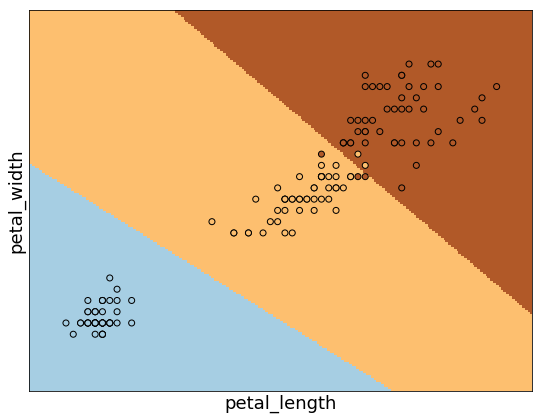

In [4]:
# ONLY NEED TO CHANGE THESE:
xcol = 'petal_length'
ycol = 'petal_width'

pars = {'X':            data.loc[:, [xcol, ycol]],  # training data 
        'y':            data.Species,               # response
        'xcol':         xcol, 
        'ycol':         ycol, 
        'h':            0.02}


plot_iris_meshgrid(**pars)

# [Their Version](https://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html#sphx-glr-auto-examples-linear-model-plot-iris-logistic-py)

Automatically created module for IPython interactive environment


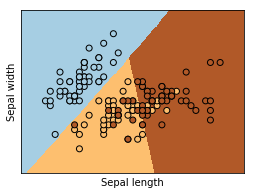

In [5]:
print(__doc__)

# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

from sklearn import datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

logreg = LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial')

# Create an instance of Logistic Regression Classifier and fit the data.
logreg.fit(X, Y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()